In [1]:
# !pip install --upgrade pip --quiet
# !pip install -r requirements.txt --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as roc_auc_score


# Loading raw_data provided with the problem statement.

In [57]:
def load_raw_data():
#     current_file = os.path.abspath(os.path.dirname())
    current_file = ""

    csv_filename = os.path.join(current_file, '../training_data/campaign_data.csv')
    campaign_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/coupon_item_mapping.csv')
    coupon_item_mapping_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/customer_demographics.csv')
    customer_demographics_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/customer_transaction_data.csv')
    customer_transaction_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/item_data.csv')
    item_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/train.csv')
    train_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../test_data/test_QyjYwdj.csv')
    test_data = pd.read_csv(csv_filename)
    
    return campaign_data, coupon_item_mapping_data, customer_demographics_data, \
           customer_transaction_data, item_data, train_data, test_data

In [58]:
campaign_data_pure, coupon_item_mapping_data_pure, customer_demographics_data_pure, \
customer_transaction_data_pure, item_data_pure, train_data_pure, test_data_pure  = load_raw_data()


In [59]:
# Saving a copy of raw_data read from csv so as to avoid re-reading, in case any changes are made in the 
# respective dataframes and original version is desired.
# This is not the best solution; if either he dataset is large or further computations require huge memory.
campaign_data, coupon_item_mapping_data, customer_demographics_data, \
customer_transaction_data, item_data, train_data, test_data \
= campaign_data_pure, coupon_item_mapping_data_pure, customer_demographics_data_pure, \
customer_transaction_data_pure, item_data_pure, train_data_pure, test_data_pure


# Data-cleaning

## Basic utilities for data-analysis

In [60]:
def univariate_analysis(df):
    print("\n Head: ")
    print(df.head())
    
    print("\n Uniqueness analysis: ")
    print(df.nunique())

    print("\n Number of NaN Entries: ")
    print(df.isna().sum())

    print("\n Number of Null Entries: ")
    print(df.isnull().sum())

    print("\n Statistical Description: ")
    print(df.describe(include='all'))


## 'campaign_data' data-cleaning and imputation

In [61]:
print("\n -------------------------------------- campaign_data --------------------------------------- ")
campaign_data_columns =  campaign_data.columns.values
print("\n campaign_data_columns: ", campaign_data_columns)

univariate_analysis(campaign_data)

campaign_data['start_date'] = pd.to_datetime(campaign_data.start_date, format="%d/%m/%y")
campaign_data['end_date'] = pd.to_datetime(campaign_data.end_date, format="%d/%m/%y")



 -------------------------------------- campaign_data --------------------------------------- 

 campaign_data_columns:  ['campaign_id' 'campaign_type' 'start_date' 'end_date']

 Head: 
   campaign_id campaign_type start_date   end_date
0           24             Y 2013-10-21 2013-12-20
1           25             Y 2013-10-21 2013-11-22
2           20             Y 2013-07-09 2013-11-16
3           23             Y 2013-08-10 2013-11-15
4           21             Y 2013-09-16 2013-10-18

 Uniqueness analysis: 
campaign_id      28
campaign_type     2
start_date       25
end_date         26
dtype: int64

 Number of NaN Entries: 
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

 Number of Null Entries: 
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

 Statistical Description: 
        campaign_id campaign_type           start_date             end_date
count     28.000000            28                   28 

## 'coupon_item_mapping_data' data-cleaning and imputation


In [62]:
print("\n -------------------------------------- coupon_item_mapping_data --------------------------------------- ")
coupon_item_mapping_data_columns =  coupon_item_mapping_data.columns.values
print("\n coupon_item_mapping_data_columns: ", coupon_item_mapping_data_columns)

univariate_analysis(coupon_item_mapping_data)



 -------------------------------------- coupon_item_mapping_data --------------------------------------- 

 coupon_item_mapping_data_columns:  ['coupon_id' 'item_id']

 Head: 
   coupon_id  item_id
0        105       37
1        107       75
2        494       76
3        522       77
4        518       77

 Uniqueness analysis: 
coupon_id     1116
item_id      36289
dtype: int64

 Number of NaN Entries: 
coupon_id    0
item_id      0
dtype: int64

 Number of Null Entries: 
coupon_id    0
item_id      0
dtype: int64

 Statistical Description: 
          coupon_id       item_id
count  92663.000000  92663.000000
mean     155.967387  36508.613071
std      282.991720  21131.312716
min        1.000000      1.000000
25%       22.000000  18255.500000
50%       30.000000  37955.000000
75%       42.000000  54191.500000
max     1116.000000  74061.000000


## 'customer_transaction_data' data-cleaning and imputation


In [63]:
print("\n -------------------------------------- customer_transaction_data --------------------------------------- ")
customer_transaction_data_columns =  customer_transaction_data.columns.values
print("\n customer_transaction_data_columns: ", customer_transaction_data_columns)
univariate_analysis(customer_transaction_data)

customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data.date, format="%Y/%m/%d")

# Adding column: 'cost_price' =  selling_price - coupon_discount - other_discount
customer_transaction_data_pure['cost_price'] = \
customer_transaction_data_pure.selling_price - \
customer_transaction_data_pure.coupon_discount - \
customer_transaction_data_pure.other_discount

# Adding column: 'rate' =  cost_price / quantity
customer_transaction_data_pure['rate'] = \
customer_transaction_data_pure['cost_price'] / customer_transaction_data_pure['quantity']



 -------------------------------------- customer_transaction_data --------------------------------------- 

 customer_transaction_data_columns:  ['date' 'customer_id' 'item_id' 'quantity' 'selling_price'
 'other_discount' 'coupon_discount']

 Head: 
        date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
3 2012-01-02         1501    33647         1          67.32            0.00   
4 2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

 Uniqueness analysis: 
date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923

## 'item_data' data-cleaning and imputation


In [64]:
print("\n -------------------------------------- item_data --------------------------------------- ")
item_data_columns =  item_data.columns.values
print("\n item_data_columns: ", item_data_columns)
univariate_analysis(item_data)



 -------------------------------------- item_data --------------------------------------- 

 item_data_columns:  ['item_id' 'brand' 'brand_type' 'category']

 Head: 
   item_id  brand   brand_type       category
0        1      1  Established        Grocery
1        2      1  Established  Miscellaneous
2        3     56        Local         Bakery
3        4     56        Local        Grocery
4        5     56        Local        Grocery

 Uniqueness analysis: 
item_id       74066
brand          5528
brand_type        2
category         19
dtype: int64

 Number of NaN Entries: 
item_id       0
brand         0
brand_type    0
category      0
dtype: int64

 Number of Null Entries: 
item_id       0
brand         0
brand_type    0
category      0
dtype: int64

 Statistical Description: 
             item_id         brand   brand_type category
count   74066.000000  74066.000000        74066    74066
unique           NaN           NaN            2       19
top              NaN           NaN

## 'customer_demographics_data' data-cleaning and imputation

In [65]:
print("\n -------------------------------------- customer_demographics_data --------------------------------------- ")
customer_demographics_data_columns =  customer_demographics_data.columns.values
print("\n customer_demographics_data_columns: ", customer_demographics_data_columns)
univariate_analysis(customer_demographics_data)


 -------------------------------------- customer_demographics_data --------------------------------------- 

 customer_demographics_data_columns:  ['customer_id' 'age_range' 'marital_status' 'rented' 'family_size'
 'no_of_children' 'income_bracket']

 Head: 
   customer_id age_range marital_status  rented family_size no_of_children  \
0            1       70+        Married       0           2            NaN   
1            6     46-55        Married       0           2            NaN   
2            7     26-35            NaN       0           3              1   
3            8     26-35            NaN       0           4              2   
4           10     46-55         Single       0           1            NaN   

   income_bracket  
0               4  
1               5  
2               3  
3               6  
4               5  

 Uniqueness analysis: 
customer_id       760
age_range           6
marital_status      2
rented              2
family_size         5
no_of_children   

In [66]:
# Converting 'family_size' = 5+ to numeric 5.
customer_demographics_data.loc[(customer_demographics_data.family_size=='5+'), "family_size"] = '5'
customer_demographics_data.family_size = pd.to_numeric(customer_demographics_data.family_size)


# Converting 'no_of_children' = 3+ to numeric 3.
customer_demographics_data.loc[ customer_demographics_data.no_of_children == '3+', "no_of_children" ] = 3
customer_demographics_data.no_of_children = pd.to_numeric(customer_demographics_data.no_of_children)


# Converting 'age_range' buckets to numeric mean of the repsective buckets.
# Other few approaches could have been to choose the min or max. But, given the varied bucket sizes,
# 'mean' seems to be a more representative of the bucket.
# (assuming a Gaussian distribution of data within each bucket)
customer_demographics_data.loc[customer_demographics_data.age_range=='18-25', "age_range"] = 21.5
customer_demographics_data.loc[customer_demographics_data.age_range=='26-35', "age_range"] = 30.5
customer_demographics_data.loc[customer_demographics_data.age_range=='36-45', "age_range"] = 40.5
customer_demographics_data.loc[customer_demographics_data.age_range=='46-55', "age_range"] = 50.5
customer_demographics_data.loc[customer_demographics_data.age_range=='56-70', "age_range"] = 63
customer_demographics_data.loc[customer_demographics_data.age_range=='70+', "age_range"] = 75
customer_demographics_data.age_range = pd.to_numeric(customer_demographics_data.age_range)

### Imputation of customer_demographics_data

In [67]:
# If no_of_children is null and family_size is 1; no_of_children should be 0.
customer_demographics_data.loc[ (customer_demographics_data.no_of_children.isnull()) \
                                    & (customer_demographics_data.family_size==1), "no_of_children"] = 0


# If marital_status is null and family_size is 1; marital_status should be 'Single'.
customer_demographics_data.loc[ (customer_demographics_data.marital_status.isnull()) \
                                    & (customer_demographics_data.family_size==1), "marital_status"] = 'Single'


# If no_of_children is null, marital_status is 'Married', and  family_size is 2; no_of_children should be 0.
customer_demographics_data.loc[ (customer_demographics_data.no_of_children.isnull()) \
                                    & (customer_demographics_data.marital_status=='Married') \
                                    & (customer_demographics_data.family_size==2), "no_of_children"] = 0



In [68]:
# Checking the distribution of marital_status for customers with no_of_children > 0.
customer_demographics_data.loc[customer_demographics_data.no_of_children > 0].marital_status.value_counts()

Married    142
Single      23
Name: marital_status, dtype: int64

In [72]:
# 13.9% of customers were with no_of_children > 0 and marital_status = 'Single'.
# Keeping the distribution intact during imputation.
customer_demographics_data.loc[(customer_demographics_data.marital_status.isnull()) \
                               & (customer_demographics_data.no_of_children > 0), "marital_status"] \
= ('Married' if (random.uniform(0, 100) >= 14) else 'Single')

In [73]:
# Checking the demographics for customer where no_of_children is null, but marital_status has a valid value.
print(customer_demographics_data.loc[~(customer_demographics_data.marital_status.isna())\
                              & (customer_demographics_data.no_of_children.isna())])

     customer_id  age_range marital_status  rented  family_size  \
5             11       75.0         Single       0            2   
12            22       40.5         Single       0            2   
20            38       50.5         Single       0            2   
23            41       50.5         Single       0            2   
42            82       75.0         Single       0            2   
46            87       50.5         Single       0            2   
69           136       63.0         Single       0            2   
132          265       21.5         Single       0            2   
147          292       30.5         Single       1            2   
149          294       21.5         Single       0            2   
175          353       40.5         Single       0            2   
223          455       50.5         Single       0            2   
280          558       40.5         Single       0            2   
337          679       40.5         Single       1            

In [74]:
# It was found on observation that cases where 'no_of_children' was null but 'marital_status' was available all 
# were 'Single' with family_size = 2.
# Assuming that since they were 'Single', they didn't find it necessary to fill the data for 'no_of_children'.
# Hence, setting no_of_children for those records as 0.
# This assumes that the single-father and single-mother case is not there for the customers who haven't filled 
# these details.

customer_demographics_data.loc[~(customer_demographics_data.marital_status.isna())\
                              & (customer_demographics_data.no_of_children.isna()), "no_of_children" ] = 0

In [84]:
# Checking the status of null values in the 'customer_demographics_data'
print(customer_demographics_data.isna().sum())


customer_id        0
age_range          0
marital_status    89
rented             0
family_size        0
no_of_children    89
income_bracket     0
dtype: int64


In [85]:
# For the remaining data, it is observed that 89 customers still have missing data and 
# both 'marital_status' and 'no_of_children' are missing for all of these.
# Also, it is observed that all such customers have family_size = 2, and rented = 0.
# marital_status 

customer_demographics_data.loc[ (customer_demographics_data.marital_status.isna())\
                               & (customer_demographics_data.no_of_children.isna()) ].family_size.unique()

array([2])

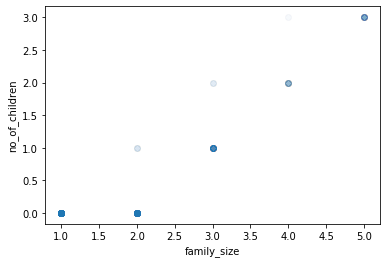

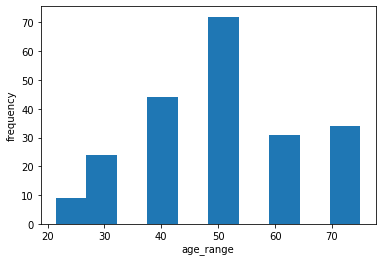

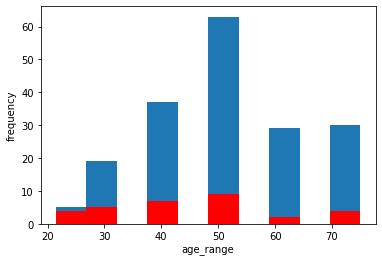

21.5     1.250000
30.5     3.800000
40.5     5.285714
50.5     7.000000
63.0    14.500000
75.0     7.500000
Name: age_range, dtype: float64

In [90]:
# Observing the marital_status of people with family_size = 2, for whom data is available.

plt.scatter(customer_demographics_data.family_size, customer_demographics_data.no_of_children,
           alpha=0.01)
plt.xlabel('family_size')
plt.ylabel('no_of_children')
plt.show()

cond = ( ~(customer_demographics_data.marital_status.isna()) \
        & ~(customer_demographics_data.no_of_children.isna()) ) \
& (customer_demographics_data.family_size == 2)



plt.hist(customer_demographics_data.loc[ cond, "age_range" ], density=False)
plt.xlabel('age_range')
plt.ylabel('frequency')
plt.show()


plt.hist(customer_demographics_data.loc[ cond \
                                        & (customer_demographics_data.marital_status == 'Married'), "age_range" ],
         density=False)



plt.hist(customer_demographics_data.loc[ cond \
                                        & (customer_demographics_data.marital_status == 'Single'), "age_range" ],
         color = 'r',
         density=False)
plt.xlabel('age_range')
plt.ylabel('frequency')
plt.show()


married_with_family_size_2_age_range = customer_demographics_data.loc[ cond \
                               & (customer_demographics_data.marital_status == 'Married'), "age_range"]

single_with_family_size_2_age_range = customer_demographics_data.loc[ cond \
                               & (customer_demographics_data.marital_status == 'Single'), "age_range"]

married_with_family_size_2_age_range.value_counts() / single_with_family_size_2_age_range.value_counts()

         

In [91]:
# Here we find out that people with family_size = 2, for whom data is available, tend to be 'Married' 
# with following ratios (Married:Single), as per the age_range:
# age_range ratio
# 21.5     5.0
# 30.5    19.0
# 40.5    18.5
# 50.5    63.0
# 63.0     NaN ---> no single
# 75.0     NaN ---> no single




In [92]:
# Based on the above observation, we fill the remaining values for marital_status = 'Married' and no_of_children = 0 
# (given the family_size is 2: the customer and their partner).

customer_demographics_data.loc[ (customer_demographics_data.marital_status.isna())\
                              & (customer_demographics_data.no_of_children.isna()) , 
                               ["marital_status", "no_of_children"] ] = ['Married', 0]


In [93]:
customer_demographics_data.isna().sum()

customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

### Saving the cleaned up data.

In [98]:
!mkdir cleaned_data

campaign_data.to_csv("cleaned_data/campaign_data.csv", index=False)
coupon_item_mapping_data.to_csv("cleaned_data/coupon_item_mapping_data.csv", index=False)
customer_demographics_data.to_csv("cleaned_data/customer_demographics_data.csv", index=False)
customer_transaction_data.to_csv("cleaned_data/customer_transaction_data.csv", index=False)
item_data.to_csv("cleaned_data/item_data.csv", index=False)
train_data.to_csv("cleaned_data/train_data.csv", index=False)

mkdir: cleaned_data: File exists


# Baseline Model



In [94]:
!mkdir submissions

def save_submission(predictions):
    submission_df = pd.concat([test_data['id'], pd.Series(predictions, name="redemption_status")], axis=1)

    submission_file_name = "submissions/" + str(int(time.time())) + ".csv"

    submission_df.to_csv(submission_file_name, index=False)

mkdir: submissions: File exists


In [95]:
# Baseline model - uses campaign_id, customer_id, coupon_id.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear')
classifier.fit(train_data.drop(columns=['id', 'redemption_status']), train_data['redemption_status'])

predictions_test = classifier.predict(test_data.drop(columns=['id']))
predictions_train = classifier.predict(train_data.drop(columns=['id', 'redemption_status']))
predictions_train_probability = classifier.predict_proba(train_data.drop(columns=['id', 'redemption_status']))

# save_submission(predictions_test)

In [96]:
print(confusion_matrix(train_data['redemption_status'], predictions_train))
print(roc_auc_score(train_data['redemption_status'], pd.DataFrame(predictions_train_probability)[1]))


[[77640     0]
 [  729     0]]
0.5746672942333827
